### Lab 1 -- part 2
### Homophily and personal networks

In [1]:
# Import all the modules we need
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [1]:
# Load in the ok book
from client.api.notebook import Notebook
lab1 = Notebook('lab1.ok')
_ = lab1.auth(inline=True, force=True)

Assignment: Demography180 Lab 1
OK, version v1.13.11


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: E1JyI4Q8QHJ55pK7ZlLlQWQrPKdaNC
Successfully logged in as ruijie_zhong@berkeley.edu


## 1.1 Converting from wide to long

In the class demo, we have only looked at the relationship between the survey respondents and the first alter that they mentioned. However, we designed our survey so that respondents could tell us about up to five alters. In order to look at all of the alters respondents reported about, we're going to have to manipulate the dataset a bit more extensively. This manipulation is a little bit tricky, but we're going to go through how it can be done step by step.

First, let's take a look at the first few rows of the dataset again to remind ourselves of how it is structured:

In [4]:
import os
os.getcwd() # this is a line that tells you the current working directory. It's a helpful move before you want to load something.
            # we are in the folder of lab1, so we can import the data directly.

'/Users/Mia/repos/demog180-sp2019-admin/labs/Lab1'

In [5]:
survey = Table.read_table('ucb_personal_networks_clean.csv')

survey.show(6)

interview_number,interview_date,interview_time,respondent_gender,respondent_age,respondent_class,respondent_home,number_alters,alter1_gender,alter1_age,alter1_class,alter1_home,alter1_howclose,alter1_howoften,alter2_gender,alter2_age,alter2_class,alter2_home,alter2_howclose,alter2_howoften,alter3_gender,alter3_age,alter3_class,alter3_home,alter3_howclose,alter3_howoften,alter4_gender,alter4_age,alter4_class,alter4_home,alter4_howclose,alter4_howoften,alter5_gender,alter5_age,alter5_class,alter5_home,alter5_howclose,alter5_howoften
1,1/24/2019,10:40:00,Male,21,Senior,Bay Area,5,Male,21,Senior,LA Area,Close friend,Once a week,Male,22,Senior,LA Area,Friend,Once a week,Male,20,Junior,Rest of United States,Close friend,Once a week,Male,21,Senior,Rest of World,Friend,nan,Female,22,Senior,Bay Area,Close friend,Once a week
2,1/24/2019,11:14:00,Male,25,Other,Bay Area,3,Male,26,Other,Bay Area,Close friend,More than once a week,Female,24,Other,Rest of United States,Close friend,More than once a week,Male,26,Other,Rest of United States,Close friend,More than once a week,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1/24/2019,11:19:00,Female,25,Other,Rest of United States,4,Female,26,Other,Rest of United States,Close friend,More than once a week,Female,28,Other,Rest of World,Close friend,More than once a week,Male,27,Other,Rest of United States,Close friend,Once a week,Female,23,Other,Rest of United States,Close friend,More than once a week,nan,nan,nan,nan,nan,nan
1,1/24/2019,10:34:00,Female,21,Senior,Bay Area,5,Female,20,Junior,Bay Area,Close friend,More than once a week,Female,21,Senior,Bay Area,Friend,More than once a week,Female,40,Other,Rest of World,Close friend,Once a week,Female,17,Other,Rest of United States,Close friend,Once a week,Female,21,Senior,Bay Area,Close friend,Once a week
2,1/24/2019,15:21:00,Female,31,Other,Bay Area,5,Female,24,Other,Rest of United States,Close friend,More than once a week,Female,24,Other,Rest of United States,Close friend,Once a week,Female,36,Other,Rest of United States,Close friend,Once a week,Female,26,Other,Rest of United States,Close friend,Once a month,Female,28,Other,Rest of United States,Close friend,Once a week
3,1/24/2019,18:23:00,Female,25,Other,Bay Area,6+,Female,25,Other,Rest of United States,Close friend,More than once a week,Female,60,Other,Rest of United States,Close friend,Once a week,Male,62,Other,Bay Area,Close friend,Once a week,Female,25,Other,Bay Area,Friend,Once a year,Female,39,Other,Rest of World,Acquaintance,Once a month


The dataset is in *wide* format: all of the information reported by a respondent is stored in a single row:

[respondent 1 info] ... [info about respondent 1's first alter] ... [info about respondent 1's second alter] ...   
[respondent 2 info] ... [info about respondent 2's first alter] ... [info about respondent 2's second alter] ...   
...

Our goal is to reshape the dataset so that the information is in *long* format instead:

[respondent 1 info] [info about respondent 1's first alter]  
[respondent 1 info] [info about respondent 1's second alter]  
[respondent 1 info] [info about respondent 1's third alter]  
[respondent 1 info] [info about respondent 1's fourth alter]  
[respondent 1 info] [info about respondent 1's fifth alter]  
[respondent 2 info] [info about respondent 2's first alter]  
[respondent 2 info] [info about respondent 2's second alter]  
...

We're going to start by creating an id variable for our survey responses. 

Always remember to double-check the results of your operations.

In [6]:
## create a respondent id variable
survey['respondent_id'] = range(1, survey.num_rows + 1) # using [] is a short-hand approach for .with_column function

In [7]:
survey.show(6)

interview_number,interview_date,interview_time,respondent_gender,respondent_age,respondent_class,respondent_home,number_alters,alter1_gender,alter1_age,alter1_class,alter1_home,alter1_howclose,alter1_howoften,alter2_gender,alter2_age,alter2_class,alter2_home,alter2_howclose,alter2_howoften,alter3_gender,alter3_age,alter3_class,alter3_home,alter3_howclose,alter3_howoften,alter4_gender,alter4_age,alter4_class,alter4_home,alter4_howclose,alter4_howoften,alter5_gender,alter5_age,alter5_class,alter5_home,alter5_howclose,alter5_howoften,respondent_id
1,1/24/2019,10:40:00,Male,21,Senior,Bay Area,5,Male,21,Senior,LA Area,Close friend,Once a week,Male,22,Senior,LA Area,Friend,Once a week,Male,20,Junior,Rest of United States,Close friend,Once a week,Male,21,Senior,Rest of World,Friend,nan,Female,22,Senior,Bay Area,Close friend,Once a week,1
2,1/24/2019,11:14:00,Male,25,Other,Bay Area,3,Male,26,Other,Bay Area,Close friend,More than once a week,Female,24,Other,Rest of United States,Close friend,More than once a week,Male,26,Other,Rest of United States,Close friend,More than once a week,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2
3,1/24/2019,11:19:00,Female,25,Other,Rest of United States,4,Female,26,Other,Rest of United States,Close friend,More than once a week,Female,28,Other,Rest of World,Close friend,More than once a week,Male,27,Other,Rest of United States,Close friend,Once a week,Female,23,Other,Rest of United States,Close friend,More than once a week,nan,nan,nan,nan,nan,nan,3
1,1/24/2019,10:34:00,Female,21,Senior,Bay Area,5,Female,20,Junior,Bay Area,Close friend,More than once a week,Female,21,Senior,Bay Area,Friend,More than once a week,Female,40,Other,Rest of World,Close friend,Once a week,Female,17,Other,Rest of United States,Close friend,Once a week,Female,21,Senior,Bay Area,Close friend,Once a week,4
2,1/24/2019,15:21:00,Female,31,Other,Bay Area,5,Female,24,Other,Rest of United States,Close friend,More than once a week,Female,24,Other,Rest of United States,Close friend,Once a week,Female,36,Other,Rest of United States,Close friend,Once a week,Female,26,Other,Rest of United States,Close friend,Once a month,Female,28,Other,Rest of United States,Close friend,Once a week,5
3,1/24/2019,18:23:00,Female,25,Other,Bay Area,6+,Female,25,Other,Rest of United States,Close friend,More than once a week,Female,60,Other,Rest of United States,Close friend,Once a week,Male,62,Other,Bay Area,Close friend,Once a week,Female,25,Other,Bay Area,Friend,Once a year,Female,39,Other,Rest of World,Acquaintance,Once a month,6


In order to convert the alter information from wide to long format, we're going to use two functions that have been written for you below.

Let's look at the function below and try to understand how it works.

In [8]:
def repeat_single_col(data, var_name, times=5):
    """Repeats a single column multiple times.
    
    Parameters
    ----------
    data : Table
        The data table containing the column to be repeated.
    var_name : str
        Text that contains the name of the column to repeat.
    times : int
        The number of times column is to be repeated.
    
    Returns
    -------
    np.array
        A single array with the contents of the column repeated five times.
    
    Examples
    --------
    >>> repeat_single_col(Table().with_columns(['respondent_age', [10]]),
                          'respondent_age')
    
    array([10, 10, 10, 10, 10])
    """
    new_col = np.tile(data.column(var_name), times)
    return new_col

The key to understanding repeat_single_col is the np.tile function. Look that function up and read its help page.

**Practice** Use np.tile to create an array that contains [1,3,5,7,1,3,5,7,1,3,5,7,1,3,5,7].

In [9]:
#np.tile? # You can remove the # sign and see the 'help' documentation for np.tile
np.tile([1,3,5,7], 4)

array([1, 3, 5, 7, 1, 3, 5, 7, 1, 3, 5, 7, 1, 3, 5, 7])

**Practice** What is the difference between np.tile and np.repeat? Do they do the same thing?
[Hint: you can use the help page to figure out what np.repeat does.]

In [10]:
#np.repeat?
np.repeat([1,3,5,7], 4)

array([1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7])

Now look at the next function, and try to understand how it works.

In [11]:
def wide_to_long(data, var_name, times=5):
    """Given columns of alter characteristics, stack them into one long column.
    
    Parameters
    ----------
    data : Table
        The data table containing the alter characteristics
    var_name : str
        Text that contains the variable name; columns of the dataset should
        match the pattern: alter[NUM]_[var_name]
        For example, if var_name is 'age' then this function expects to find
        columns in the survey dataset named 
        'alter1_age', 'alter2_age', 'alter3_age', 'alter4_age', and 'alter5_age'
    times : int
        The number of columns for each characteristic
    
    Returns
    -------
    np.array
        A single array with the contents of all of the columns stacked on top of one another.
    
    Examples
    --------
    >>> wide_to_long(Table().with_columns(['alter1_age', [10, 15],
                                           'alter2_age', [30, 35],
                                           'alter3_age', [20, 15],
                                           'alter4_age', [60, 70],
                                           'alter5_age', [20, 25]]),
                     'age')
    
    array([10, 15, 30, 35, 20, 15, 60, 70, 20, 25])
    """
    new_col = np.concatenate([data.column('alter' + str(idx) + '_' + var_name) for idx in range(1,times+1)])
    return new_col

The key to understanding this second function is np.concatenate. Look up the help page for np.concatenate.

In [ ]:
np.concatenate?

**Practice** Use `np.concatenate` to make a single array that has the contents of `column_one` and `column_two` concatenated together:

In [12]:
concat_table = Table().with_columns(['column_one', [1,3,5,7,9],
                                    'column_two', [2,4,6,8,10]])
concat_table

column_one,column_two
1,2
3,4
5,6
7,8
9,10


In [ ]:
np.concatenate(concat_table)

Now that we understand what np.concatenate does, let's run the wide_to_long() function upon a simple table to see what it does.

In [13]:
temp_table = Table().with_columns(['alter1_age', [10, 15],
                                   'alter2_age', [30, 35],
                                   'alter3_age', [20, 15],
                                   'alter4_age', [60, 70],
                                   'alter5_age', [20, 25]])
wide_to_long(temp_table,'age')

array([10, 15, 30, 35, 20, 15, 60, 70, 20, 25])

You can see that it links the head and end of columns.

We'll take a first try at converting the alter data to long format together, and then you'll do a more complete job as an exercise.

For our first step, we'll only keep the respondent's id number and the age of the alters each respondent reported about. Since there is space for 5 alters per respondent, we expect (number of respondents x 5) = (... x 5) = ... rows in our resulting dataset.

Let's construct the table.

In [14]:
alter_first_try = Table().with_columns([
    'respondent_id', repeat_single_col(survey, 'respondent_id'),
    'alter_age', wide_to_long(survey, 'age')])

You can see that we want to use `repeat_single_col` for the column that is a respondent characteristic and that we want to use `wide_to_long` for the column that is an alter characteristic.

Let's check that the resulting Table, called `alter_first_try` makes sense.

**Question 1** How many rows do you think alter_first_try should have? Check the number of rows.

In [ ]:
q1 = ...
q1

In [ ]:
_ = ok.grade('q1')

**Practice** The following statement allows you to double-check that each respondent appears five times in this dataset.

In [15]:
np.all(alter_first_try.group('respondent_id').column('count') == 5)

True

**Practice** Now it's your turn! Using the example above as a pattern, create a long dataset that has

* respondent id
* respondent age
* respondent class
* respondent home
* alter age
* alter gender
* alter class
* alter home

Don't forget to perform a couple of checks to be sure the resulting dataset makes sense (like we did above).

**Hint: you need to repeat the information for the respondent and convert from wide to long for the alters' information.**

In [16]:
alter_data = Table().with_columns([
    'respondent_id', repeat_single_col(survey, 'respondent_id'),
    'respondent_age', repeat_single_col(survey, 'respondent_age'),
    'respondent_class', repeat_single_col(survey, 'respondent_class'),
    'respondent_home', repeat_single_col(survey, 'respondent_home'),
    'alter_age', wide_to_long(survey, 'age'),
    'alter_gender', wide_to_long(survey, 'gender'),
    'alter_class', wide_to_long(survey, 'class'),
    'alter_home', wide_to_long(survey, 'home'),])

alter_data

respondent_id,respondent_age,respondent_class,respondent_home,alter_age,alter_gender,alter_class,alter_home
1,21,Senior,Bay Area,21,Male,Senior,LA Area
2,25,Other,Bay Area,26,Male,Other,Bay Area
3,25,Other,Rest of United States,26,Female,Other,Rest of United States
4,21,Senior,Bay Area,20,Female,Junior,Bay Area
5,31,Other,Bay Area,24,Female,Other,Rest of United States
6,25,Other,Bay Area,25,Female,Other,Rest of United States
7,23,Junior,Rest of World,53,Female,Other,Rest of World
8,21,Other,Rest of World,21,Female,Other,Bay Area
9,19,Sophomore,Rest of World,20,Female,Sophomore,Rest of World
10,18,Freshman,Rest of United States,18,Female,Freshman,Rest of United States


Check the number of rows of the new table as well as the repetitions of the repondents in the new table

In [17]:
nrow = alter_data.num_rows
nrow

515

In [18]:
# double check that each respondent appears 5 times
np.all(alter_data.group('respondent_id').column('count') == 5)

True

### Ages of Berkeley students' confidants

OK, now that we have created a long-form dataset, let's make use of it to learn about the people Berkeley students discuss important matters with.

Start by trying to make a histogram of the confidants' ages. (You will get an error -- read the error message and then see the next question.)

/Users/Mia/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/Mia/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


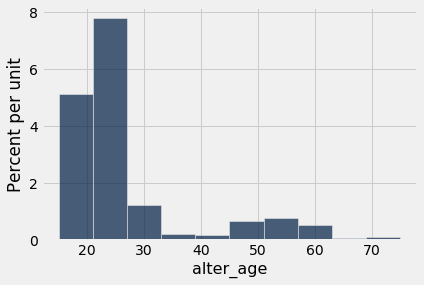

In [19]:
alter_data.hist('alter_age')

You get an error message because some of the rows of the dataset have nan or 'not a number' for the value of age. Why? Because not every respondent reported 5 alters. So we need to filter our dataset down to only have data from actual reports about alters.

We will do this by assuming that if alter_age is nan, then no alter was reported about.

**Question 2** Use a where statement to keep only the rows of alter_data that do not have an nan value for alter_age.

[HINT 1: this is a little tricky. Check out the np.isnan function.]
[HINT 2: you can flip an array of Boolean values by using ~. So ~ [False, True, False] equals [True, False, True].

In [ ]:
# Prep
np.isnan?

In [ ]:
# First step, get the booleans (trues and falses) for constructing the table
# If it's TRUE for the 1st row, it will be kept in the new table, otherwise it will be filtered out.
boolean = ...(alter_data.column('alter_age')) # fill in the code before the ()

In [ ]:
# Second step, construct the new data table
alter_data = ...
alter_data.show() # the filtered alte_data

In [ ]:
# Finally, check the number of rows
q2 = ...
q2

In [ ]:
_ = ok.grade('q2')

Now you can make a histogram of the ages of the alters.

In [ ]:
alter_data.hist('alter_age')

**Question 3** Now make a histogram of the survey respondents' ages.

Please take a look at the `bins` argument and see how to make reasonable bins, and you can try and see what happens if you remove this and plot with the line we used for alter's age. <BR>

In [ ]:
# Clean the nan values like you did for alter_data (try to combine the 2 steps in one line)
survey = ...
survey.select('respondent_age').hist(bins=np.arange(15, 30, 1))

In [ ]:
# Check the number of rows of the cleaned "survey"
q3 = ...

In [ ]:
_ = ok.grade('q3')

**Question** Compare the two histograms. What does this tell you about homophily among confidants?

<div class='response'>
[Answer here]
</class>

Now you can make a scatter plot comparing the ages of survey respondents and the ages of the alters.

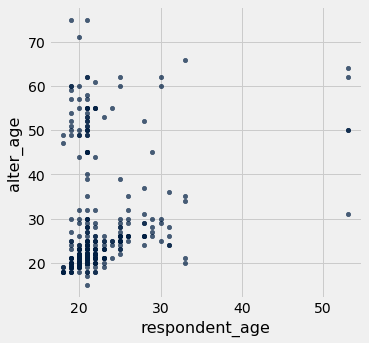

In [20]:
alter_data.scatter('respondent_age', 'alter_age')

**Question** What does this scatter plot tell you about homophily among confidants?

<div class='response'>
[Answer here]
</class>

We are able to get a lot of descriptive information from these two datasets. Here are two practice examples.

**Practice** What is the range of the age of the age?

In [21]:
oldest = np.max(alter_data.column('alter_age'))
youngest = np.min(alter_data.column('alter_age'))

print('oldest age:', oldest)
print('youngest age:', youngest)

oldest age: nan
youngest age: nan


**Practice** What's the proportion of alters from Bay Area of all the alters?

In [22]:
# First, you create a variable, alter_bay which has value False if the alter is not from the Bay Area, and True otherwise.
alter_bay = alter_data.column('alter_home') == 'Bay Area' # two equal marks == constructs a comparison, the result is true (equal to) or false (not equalt to)

In [23]:
# Secondly, you calculate the proportion of the rows which has the alter_bay variable True.
alter_bay_proportion = np.mean(alter_bay)
alter_bay_proportion

0.26990291262135924

### Class year of Berkeley students' confidants

In this section, we will start to explore the relationship between respondents' class years and their alters' class years. Our approach will be to walk through one example -- the alters reported by freshmen -- in detail. Then, we will write a function to easily allow us to repeat our analysis for sophomores, juniors, and seniors.

First, let us look at the distribution of class year among all of the confidants reported. First use `group` to make a simple table with the counts of alters by class year.

In [24]:
alter_data.group('alter_class')

alter_class,count
Freshman,11
Junior,143
Other,206
Senior,101
Sophomore,33
nan,21


**Practice** Now make a bar plot that shows those counts graphically.

In [25]:
# First we sort this table by counts of each group
alter_data.group('alter_class').sort('count', descending=True)

alter_class,count
Other,206
Junior,143
Senior,101
Sophomore,33
nan,21
Freshman,11


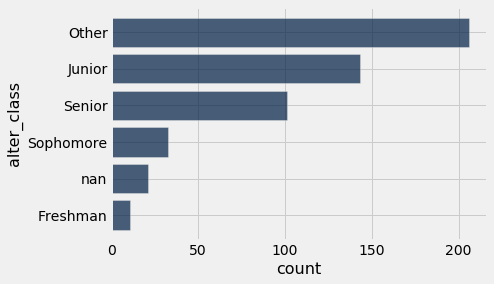

In [26]:
# By adding the function of plotting: .barh(the variable you want to plot), we can create a bar plot.
alter_data.group('alter_class').sort('count', descending=True).barh('alter_class')

**Practice** Make another bar plot that shows the class years of survey respondents.

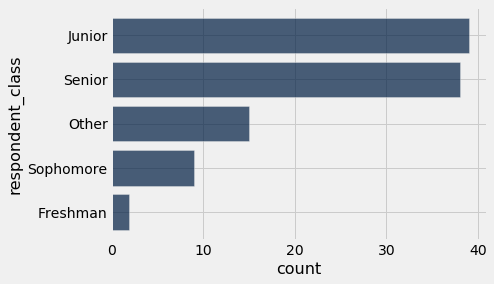

In [27]:
survey.group('respondent_class').sort('count', descending=True).barh('respondent_class')

Now that we have a sense of what all respondents and all of the alters look like, we can dig into the alters of a particulr class group.

**Question 4** Create a new table that only has alters reported by respondents who are sophomores using `where` and `are.equal_to`.

In [ ]:
alters_of_sophomores = ...

q4 = alters_of_sophomores.num_rows
q4

In [ ]:
_ = ok.grade('q4')

Make a plot that shows the class years reported by alters of sophomores.

In [28]:
alters_of_sophomores.group('alter_class').barh('alter_class')

NameError: name 'alters_of_sophomores' is not defined

**Practice** Make a function called `plot_alter_class` that makes a plot of the class years of alters reported by respondents in a particular class. Your function should take as its arguments

* `data` - the alter dataset
* `class_year` - the class year of respondents to focus on
    
For example, running

    plot_alter_class(alter_data, 'Freshman')

should produce the plot you just made above.

In [29]:
def plot_alter_class(data, class_year):
    to_plot = data.where('respondent_class', are.equal_to(class_year)) #create the dataset for plotting
    to_plot.group('alter_class').barh('alter_class')

**Practice** Use your function to produce plots of the class years of the alters of freshmen, sophomores, juniors, and seniors.

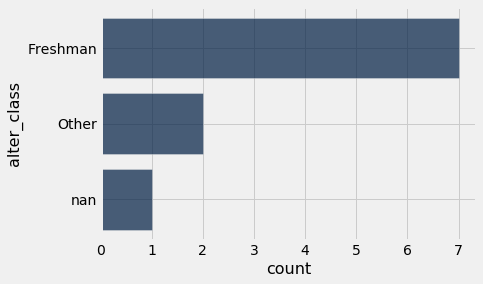

In [30]:
# freshmen
plot_alter_class(alter_data, 'Freshman')

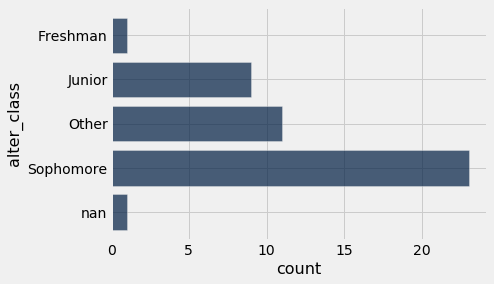

In [31]:
# sophomores
plot_alter_class(alter_data, 'Sophomore')

In [ ]:
# juniors
plot_alter_class(alter_data, 'Junior')

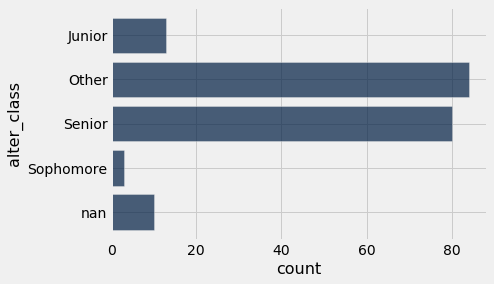

In [32]:
# seniors
plot_alter_class(alter_data, 'Senior')

**Question** Do you see evidence of homophily with respect to class year?

<div class='response'>
[Answer here]
</class>

### Rerun the tests and submit your lab

In [33]:
import os
print("Running all tests...")
_ = [lab1.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question > Suite 1 > Case 1

>>> round(q1,1) == 515.0
NameError: name 'q1' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'q1' is not defined

Run only this test case with "python3 ok -q q1 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question > Suite 1 > Case 1

>>> round(q2,1) == 494.0
NameError: name 'q2' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'q2' is not defined

Run only thi

In order to submit your assignment, run the next cell.

You can submit as many times as you want (up to the deadline: Feb 8th, Friday 9pm).

In [3]:
_ = lab1.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab1_part2.ipynb'.
Submit... 100% complete
Backup... 100% complete
Submission successful for user: ruijie_zhong@berkeley.edu
URL: https://okpy.org/cal/demog180/sp19/lab1/submissions/xvOznn

